<a href="https://colab.research.google.com/github/mukulsingh078968/EDA-and-Feature-Engineering/blob/main/Census_datasets_All_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Model on Census Income Datasets**

**Task Performed**

1.Data Ingestion

2.EDA

3.Pre-Preprocessing

4.Model Buliding (All Algorithms with Hyperpara meters tunning GridSearchCV ,   RandomizedClassification , Optuna)

5.Make final report showing accuarcy of all model

**Attribute Information:**



Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 

State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, 

Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, 
Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, 

Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 

Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 

Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [ ]:
# Import Libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
# importing the Datasets
df=pd.read_csv('/content/census.csv')

In [18]:
# top five data
df.head()



age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4                  ?    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country income  
0            40.0  United-States  <=50K  
1            50.0  United-States  <=50K  
2            40.0  United-States   >50K  
3            40.0  United-States   >50K  
4            30.0  United-States  <=50K

In [19]:
# check the lastfive data
df.tail()

age  workclass  fnlwgt  education  education-num      marital-status  \
29116   44  State-gov  199551       11th              7           Separated   
29117   36    Private  231052    HS-grad              9           Separated   
29118   69  State-gov  203072  Doctorate             16  Married-civ-spouse   
29119   17    Private  126771       12th              8       Never-married   
29120   38    Private   31848  Assoc-voc             11  Married-civ-spouse   

           occupation   relationship   race     sex  capital-gain  \
29116    Tech-support  Not-in-family  Black    Male           0.0   
29117   Other-service      Unmarried  Black  Female           0.0   
29118  Prof-specialty        Husband  White    Male           0.0   
29119  Prof-specialty      Own-child  White    Male           0.0   
29120    Craft-repair             Hu    NaN     NaN           NaN   

       capital-loss  hours-per-week native-country income  
29116           0.0            40.0  United-States  <=50K  
29117           0.0            35.0  United-States  <=50K  
29118           0.0            50.0  United-States   >50K  
29119           0.0             7.0  United-States  <=50K  
29120           NaN             NaN            NaN    NaN

In [20]:
# check the columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [21]:
#check the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29121 entries, 0 to 29120
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29121 non-null  int64  
 1   workclass       29121 non-null  object 
 2   fnlwgt          29121 non-null  int64  
 3   education       29121 non-null  object 
 4   education-num   29121 non-null  int64  
 5   marital-status  29121 non-null  object 
 6   occupation      29121 non-null  object 
 7   relationship    29121 non-null  object 
 8   race            29120 non-null  object 
 9   sex             29120 non-null  object 
 10  capital-gain    29120 non-null  float64
 11  capital-loss    29120 non-null  float64
 12  hours-per-week  29120 non-null  float64
 13  native-country  29120 non-null  object 
 14  income          29120 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.3+ MB


In [22]:
df.shape

(29121, 15)

In [23]:
# check the sample of data
df.sample()

age workclass  fnlwgt  education  education-num      marital-status  \
22076   35   Private  348690  Bachelors             13  Married-civ-spouse   

             occupation relationship   race   sex  capital-gain  capital-loss  \
22076  Transport-moving      Husband  White  Male           0.0           0.0   

       hours-per-week native-country income  
22076            40.0  United-States  <=50K

In [24]:
# check the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64

In [25]:
# check the unique values
df.nunique()

age                  73
workclass             9
fnlwgt            20032
education            16
education-num        16
marital-status        7
occupation           15
relationship          7
race                  5
sex                   2
capital-gain        119
capital-loss         93
hours-per-week       93
native-country       41
income                2
dtype: int64

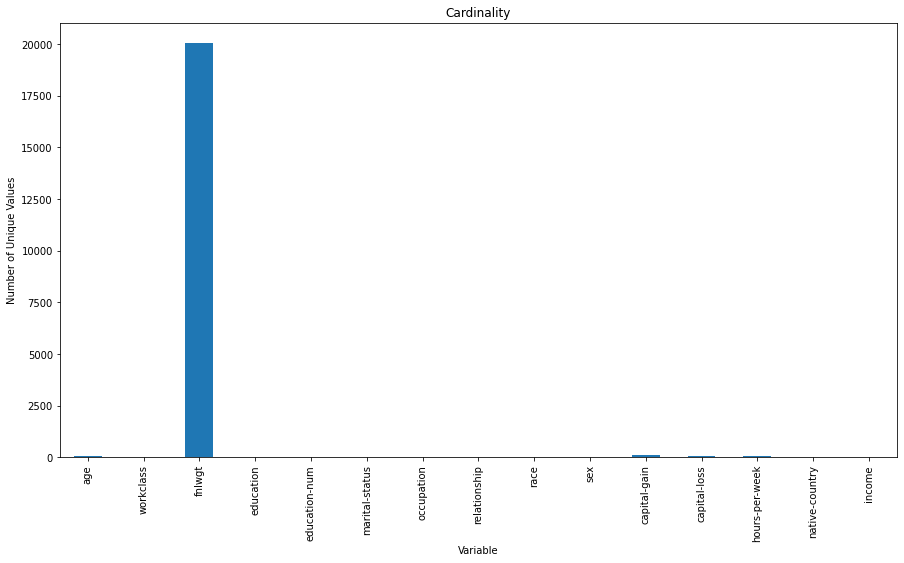

In [26]:

df.nunique().plot.bar(figsize=(15,8))
plt.xlabel("Variable")
plt.ylabel('Number of Unique Values')
plt.title('Cardinality')
plt.show()

In [27]:
# check the Dupicated Values
df.duplicated().sum()

18

In [28]:
df[df.duplicated()]

age     workclass  fnlwgt     education  education-num  \
864     24       Private  194630     Bachelors             13   
11189   37       Private   52870     Bachelors             13   
11212   29       Private   36440     Bachelors             13   
13848   30       Private  180317     Assoc-voc             11   
15960   18  Self-emp-inc  378036          12th              8   
18476   39       Private  184659       HS-grad              9   
19399   19       Private  130431       5th-6th              3   
19726   41       Private  116391     Bachelors             13   
20606   25       Private  308144     Bachelors             13   
21162   25       Private  308144     Bachelors             13   
21385   90       Private   52386  Some-college             10   
24361   21       Private  243368     Preschool              1   
25189   29             ?   41281     Bachelors             13   
25452   21       Private  250051  Some-college             10   
25652   23       Private  239539       HS-grad              9   
26122   21       Private  301694       HS-grad              9   
26375   19             ?  167428  Some-college             10   
27912   20       Private  107658  Some-college             10   

              marital-status         occupation   relationship  \
864            Never-married     Prof-specialty  Not-in-family   
11189     Married-civ-spouse    Exec-managerial        Husband   
11212          Never-married       Adm-clerical  Not-in-family   
13848               Divorced  Machine-op-inspct  Not-in-family   
15960          Never-married    Farming-fishing      Own-child   
18476     Married-civ-spouse  Machine-op-inspct        Husband   
19399          Never-married    Farming-fishing  Not-in-family   
19726     Married-civ-spouse    Exec-managerial        Husband   
20606          Never-married       Craft-repair  Not-in-family   
21162          Never-married       Craft-repair  Not-in-family   
21385          Never-married      Other-service  Not-in-family   
24361          Never-married    Farming-fishing  Not-in-family   
25189  Married-spouse-absent                  ?  Not-in-family   
25452          Never-married     Prof-specialty      Own-child   
25652          Never-married  Machine-op-inspct      Own-child   
26122          Never-married       Craft-repair  Not-in-family   
26375          Never-married                  ?      Own-child   
27912          Never-married       Tech-support  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
864                 White    Male           0.0           0.0            35.0   
11189               White    Male           0.0           0.0            40.0   
11212               White  Female           0.0           0.0            40.0   
13848               White    Male           0.0           0.0            40.0   
15960               White    Male           0.0           0.0            10.0   
18476               White    Male           0.0           0.0            40.0   
19399               White    Male           0.0           0.0            36.0   
19726               White    Male           0.0           0.0            40.0   
20606               White    Male           0.0           0.0            40.0   
21162               White    Male           0.0           0.0            40.0   
21385  Asian-Pac-Islander    Male           0.0           0.0            35.0   
24361               White    Male           0.0           0.0            50.0   
25189               White    Male           0.0           0.0            50.0   
25452               White  Female           0.0           0.0            10.0   
25652  Asian-Pac-Islander    Male           0.0           0.0            40.0   
26122               White    Male           0.0           0.0            35.0   
26375               White    Male           0.0           0.0            40.0   
27912               White  Female           0.0           

In [29]:
# Drop the Duplicated Value
df=df.drop_duplicates()

In [30]:
# check the shape 
df.shape

(29103, 15)

In [31]:
# check the target values
df['income'].unique()

array(['<=50K', '>50K', nan], dtype=object)

In [32]:
df['income'].value_counts()

<=50K    22186
>50K      6916
Name: income, dtype: int64

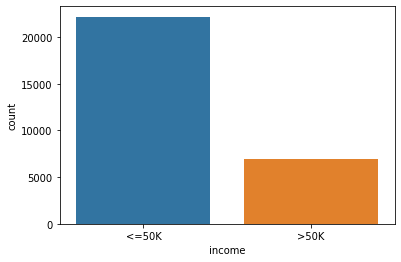

In [33]:
sns.countplot(df['income'])

In [34]:
# check the unique values of each columns
for columns in df.columns:
  print(f"Feature {columns} has {df[columns].unique()} unique features \n")

Feature age has [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87] unique features 

Feature workclass has ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] unique features 

Feature fnlwgt has [226802  89814 336951 ... 231052 203072 126771] unique features 

Feature education has ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] unique features 

Feature education-num has [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] unique features 

Feature marital-status has ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] unique features 

Feature occupation has ['Machine

Observation=( workclass ,occupation , native-count in these columns founds ? marks )

In [35]:
# Changing the Datatypes of feature
#df['age'].dtype , df['hours-per-week'].dtype

In [36]:
df['fnlwgt'].value_counts()

190290    15
120277    13
126569    12
186934    12
125892    12
          ..
215912     1
206392     1
54377      1
118174     1
126771     1
Name: fnlwgt, Length: 20032, dtype: int64

In [37]:
df['workclass'].value_counts()

Private             20131
Self-emp-not-inc     2319
Local-gov            1855
?                    1700
State-gov            1225
Self-emp-inc         1022
Federal-gov           837
Without-pay             9
Never-worked            5
Name: workclass, dtype: int64

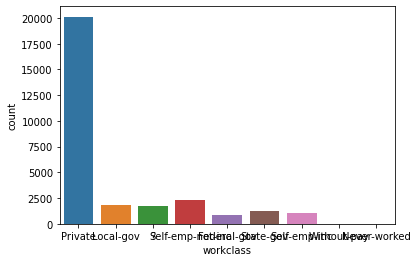

In [38]:
sns.countplot(df['workclass'])

In [39]:
df['education'].value_counts()

HS-grad         9458
Some-college    6535
Bachelors       4761
Masters         1623
Assoc-voc       1200
11th            1097
Assoc-acdm       937
10th             822
7th-8th          565
Prof-school      474
9th              431
12th             370
Doctorate        340
5th-6th          297
1st-4th          142
Preschool         51
Name: education, dtype: int64

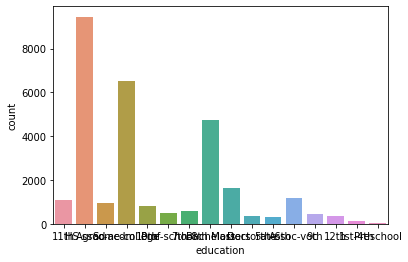

In [40]:
sns.countplot(df['education'])

In [41]:
df['education-num'].value_counts()

9     9458
10    6535
13    4761
14    1623
11    1200
7     1097
12     937
6      822
4      565
15     474
5      431
8      370
16     340
3      297
2      142
1       51
Name: education-num, dtype: int64

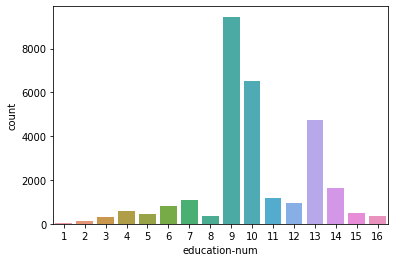

In [42]:
sns.countplot(df['education-num'])


In [43]:
df['marital-status'].value_counts()

Married-civ-spouse       13285
Never-married             9630
Divorced                  3963
Separated                  923
Widowed                    897
Married-spouse-absent      382
Married-AF-spouse           23
Name: marital-status, dtype: int64

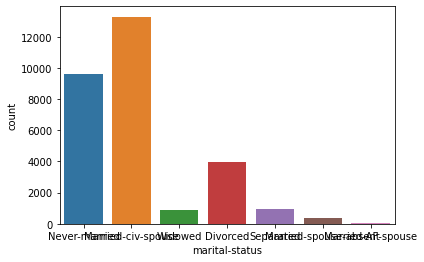

In [44]:
sns.countplot(df['marital-status'])

In [45]:
df['occupation'].value_counts()

Prof-specialty       3651
Craft-repair         3601
Exec-managerial      3583
Adm-clerical         3385
Sales                3319
Other-service        2944
Machine-op-inspct    1802
?                    1705
Transport-moving     1393
Handlers-cleaners    1215
Tech-support          877
Farming-fishing       870
Protective-serv       597
Priv-house-serv       153
Armed-Forces            8
Name: occupation, dtype: int64

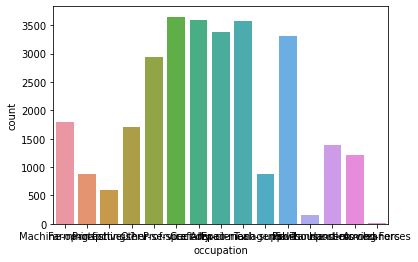

In [46]:
sns.countplot(df['occupation'])

In [47]:
df['relationship'].value_counts()

Husband           11691
Not-in-family      7577
Own-child          4505
Unmarried          3041
Wife               1394
Other-relative      894
Hu                    1
Name: relationship, dtype: int64

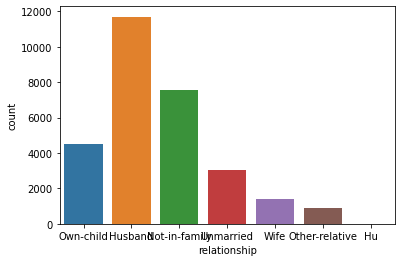

In [48]:
sns.countplot(df['relationship'])

In [49]:
df['sex'].value_counts()

Male      19453
Female     9649
Name: sex, dtype: int64

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

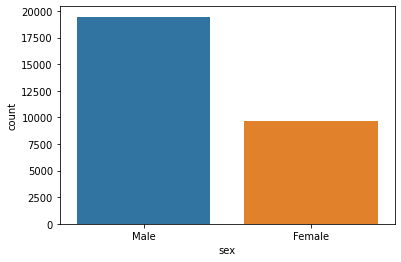

In [50]:
sns.countplot(df['sex'])

df.columns

In [51]:
df['capital-gain'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1           0.0
2           0.0
3        7688.0
4           0.0
          ...  
29116       0.0
29117       0.0
29118       0.0
29119       0.0
29120       NaN
Name: capital-gain, Length: 29103, dtype: float64>

In [52]:
df['capital-loss'].value_counts()

0.0       27724
1902.0      190
1977.0      159
1887.0      125
1590.0       44
          ...  
1870.0        1
4356.0        1
2489.0        1
1755.0        1
3683.0        1
Name: capital-loss, Length: 93, dtype: int64

In [53]:
df['hours-per-week'].value_counts


<bound method IndexOpsMixin.value_counts of 0        40.0
1        50.0
2        40.0
3        40.0
4        30.0
         ... 
29116    40.0
29117    35.0
29118    50.0
29119     7.0
29120     NaN
Name: hours-per-week, Length: 29103, dtype: float64>

In [54]:

df['native-country'].value_counts()

United-States                 26140
Mexico                          549
?                               504
Philippines                     169
Germany                         129
Puerto-Rico                     123
Canada                          114
India                            88
El-Salvador                      88
China                            81
Cuba                             79
England                          75
South                            73
Jamaica                          61
Dominican-Republic               59
Italy                            59
Poland                           55
Japan                            52
Haiti                            51
Guatemala                        51
Vietnam                          46
Portugal                         46
Columbia                         42
Iran                             39
Greece                           38
Taiwan                           36
Ecuador                          28
Nicaragua                   

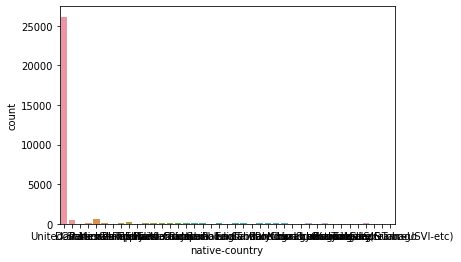

In [55]:
sns.countplot(df['native-country'])

In [56]:

#Segregate categorical and Numerical columns
[feature for feature in df.columns]

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [57]:
# Numerical Columns 
num_columns=[feature for feature in df.columns if df[feature].dtypes!='object']
num_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc53fab00d0>,
      dtype=object)

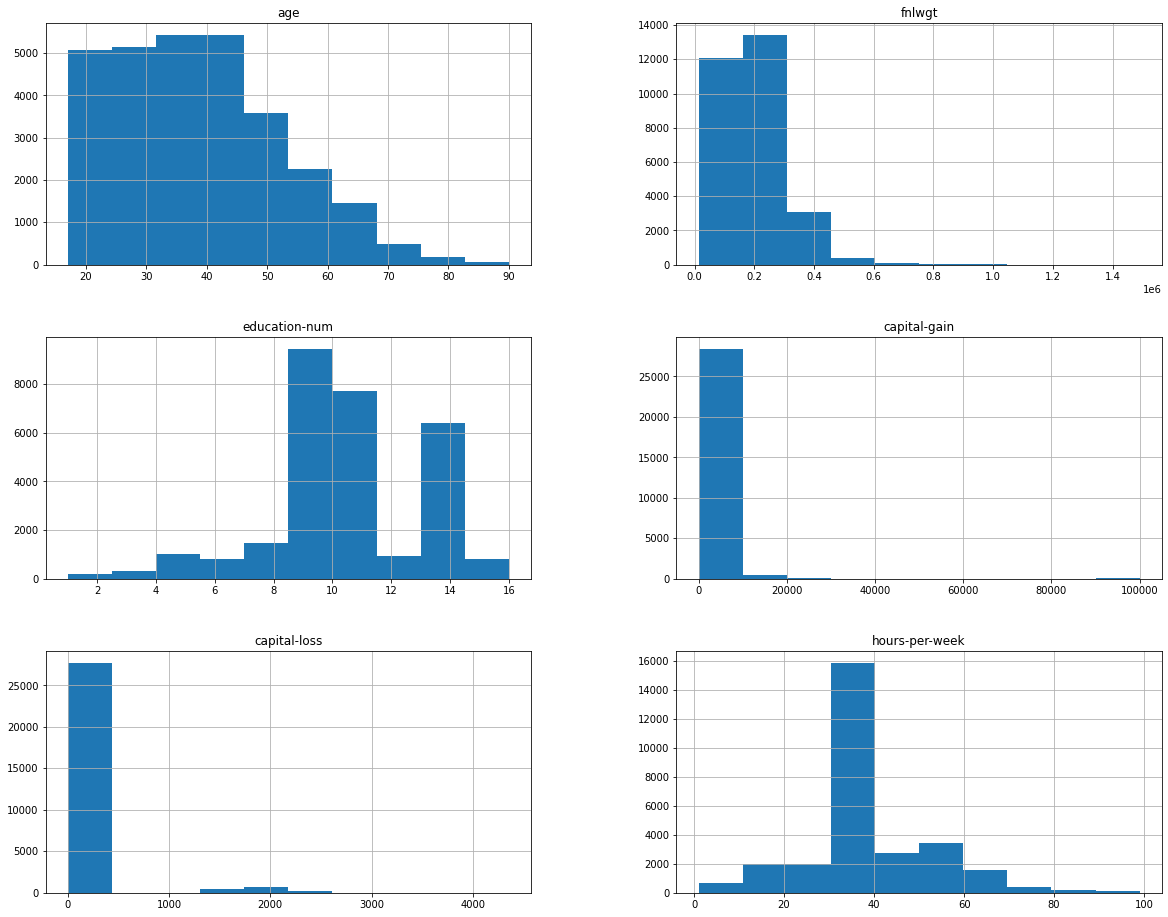

In [58]:
df.hist(figsize=(20,16))

In [59]:
# Categorical Columns
cat_columns= [feature for feature in df.columns if df[feature].dtypes=='object']
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [60]:
# Getting count of each Category from dataframe
for feature in cat_columns:
  print(df[feature].value_counts())

Private             20131
Self-emp-not-inc     2319
Local-gov            1855
?                    1700
State-gov            1225
Self-emp-inc         1022
Federal-gov           837
Without-pay             9
Never-worked            5
Name: workclass, dtype: int64
HS-grad         9458
Some-college    6535
Bachelors       4761
Masters         1623
Assoc-voc       1200
11th            1097
Assoc-acdm       937
10th             822
7th-8th          565
Prof-school      474
9th              431
12th             370
Doctorate        340
5th-6th          297
1st-4th          142
Preschool         51
Name: education, dtype: int64
Married-civ-spouse       13285
Never-married             9630
Divorced                  3963
Separated                  923
Widowed                    897
Married-spouse-absent      382
Married-AF-spouse           23
Name: marital-status, dtype: int64
Prof-specialty       3651
Craft-repair         3601
Exec-managerial      3583
Adm-clerical         3385
Sales         

In [61]:
# Creating a function for trimming the space from each values in columns and replacing the  ?  values from each feature
df['workclass']=df['workclass'].replace("?",np.nan)
df['occupation']=df['occupation'].replace("?" , np.nan)
df['native-country']=df['native-country'].replace("?",np.nan)

In [62]:
for feature in cat_columns:
  print(df[feature].unique())

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'
 'Hu']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo' nan]
['Male' 'Female' nan]
['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Colum

In [63]:

df.dropna(inplace=True)

In [64]:
df.shape

(26924, 15)

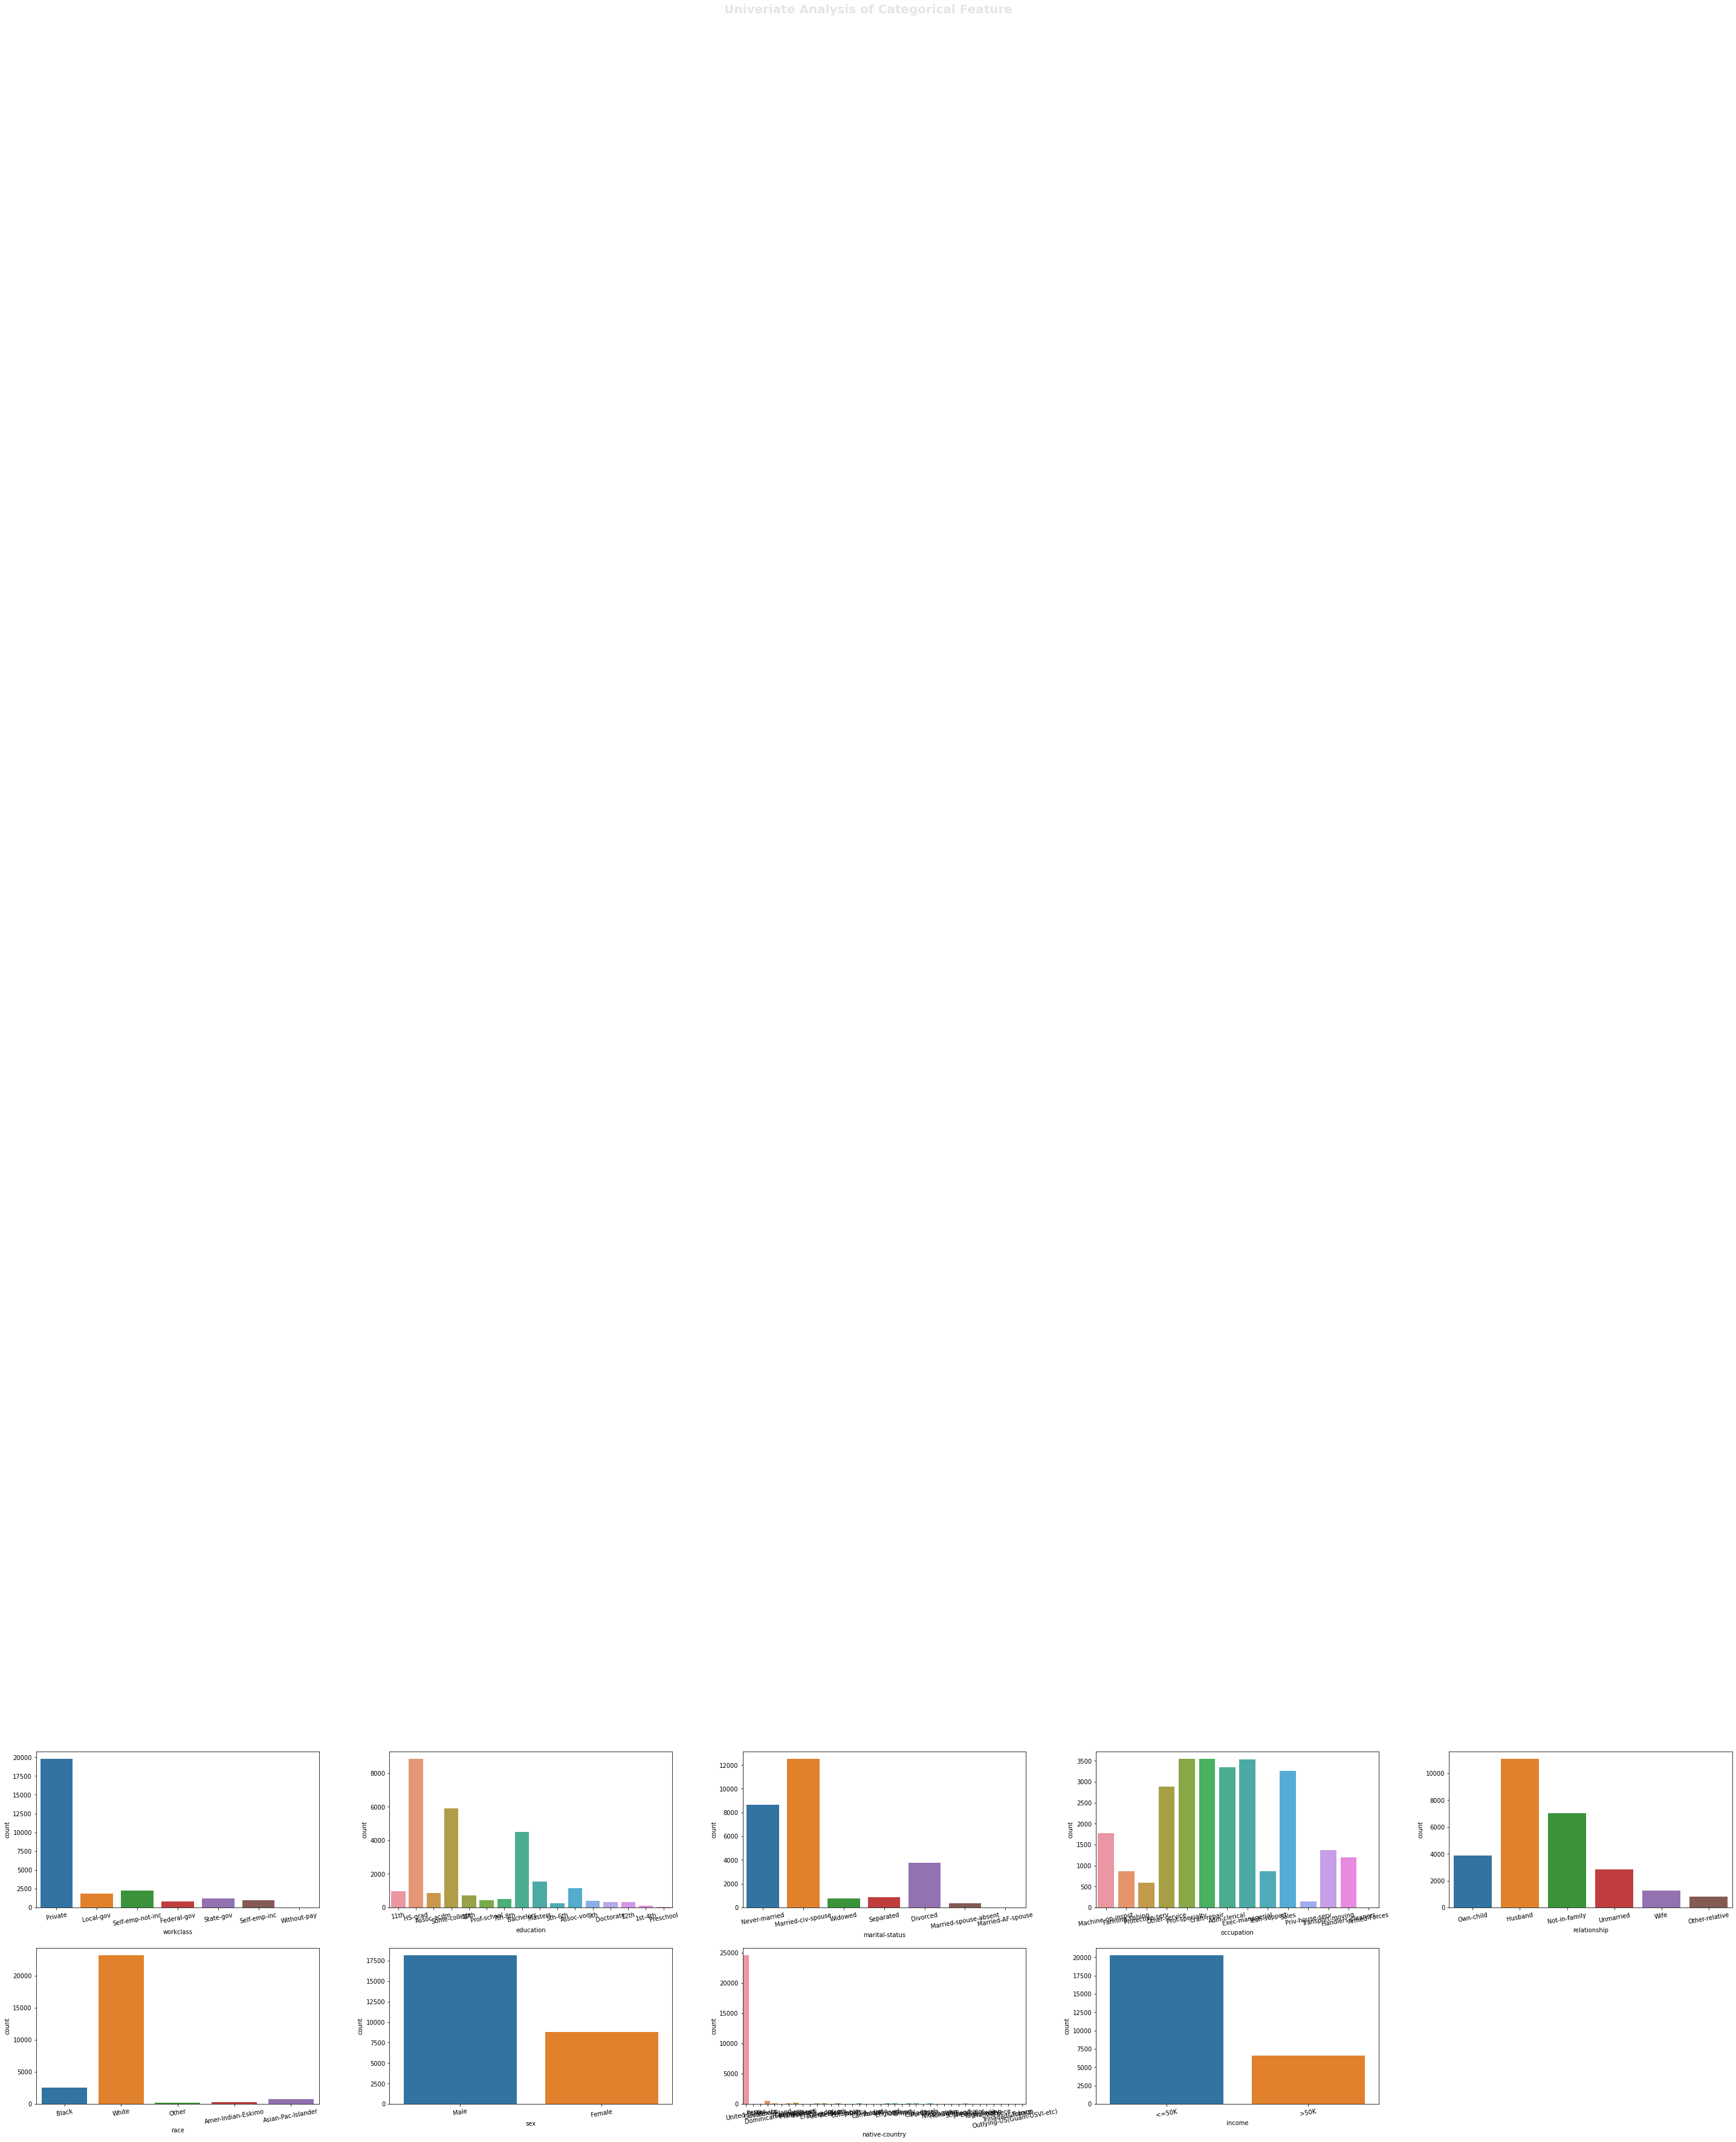

In [65]:
plt.figure(figsize=(40,40))
plt.suptitle('Univeriate Analysis of Categorical Feature',fontsize = 20, fontweight='bold' , alpha = 0.10, y=2.)
cat_columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
for i in range(0 , len(cat_columns)):
    plt.subplot(9,5, i+1)
    sns.countplot(x=df[cat_columns[i]])
    plt.xlabel(cat_columns[i])
    plt.xticks(rotation=10)
    plt.tight_layout()


# **which one will be most popular education degree**

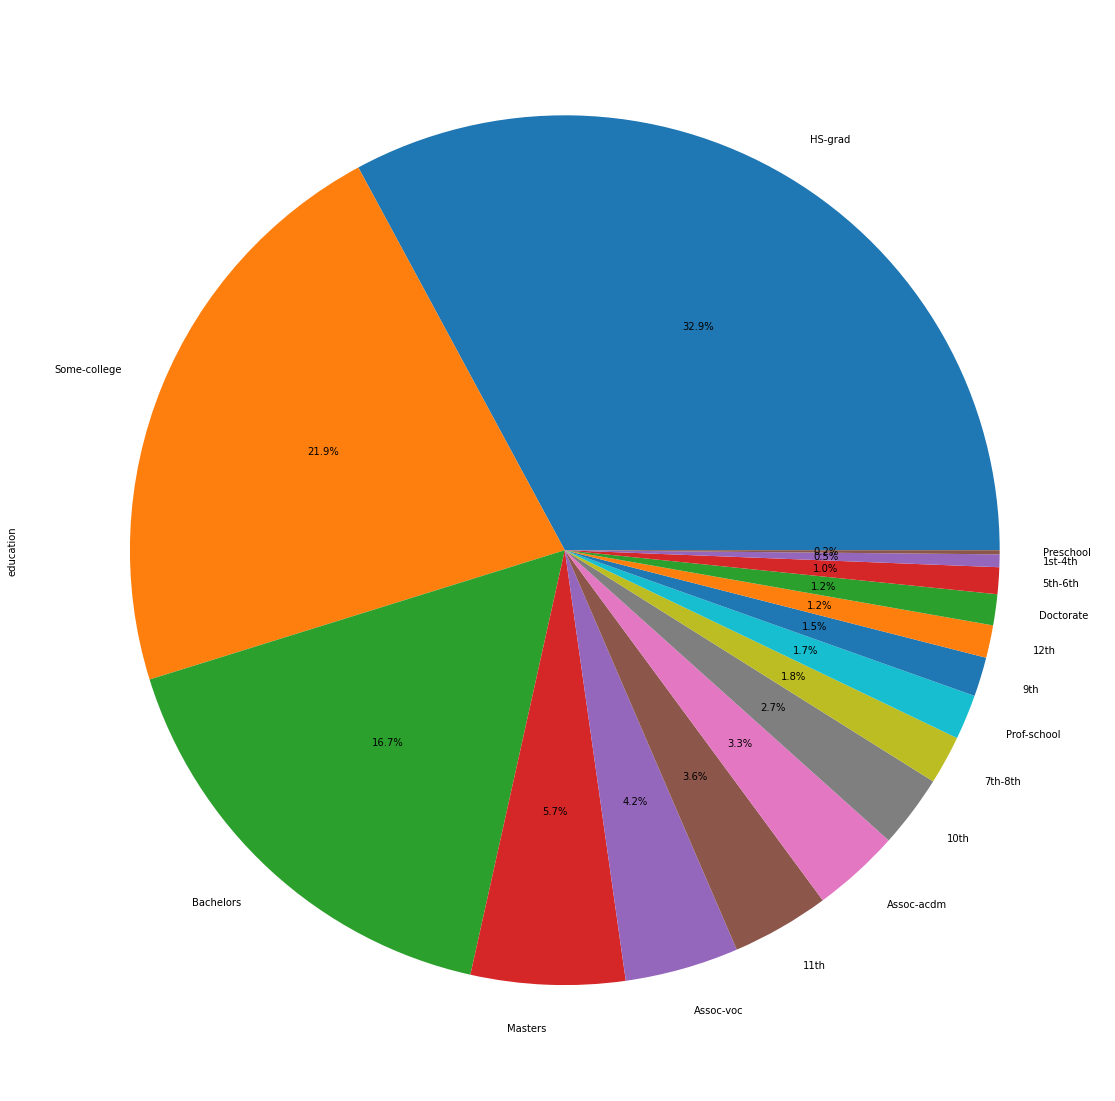

In [66]:
df['education'].value_counts().plot.pie(figsize=(20,20),autopct="%1.1f%%")



**Statistical Based analysis**

In [67]:
# check the statistical analysis
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  26924.000000  2.692400e+04   26924.000000  26924.000000  26924.000000   
mean      38.591145  1.899133e+05      10.117553   1106.492015     89.532165   
std       13.251250  1.053405e+05       2.545102   7587.519937    405.975466   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.174770e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783220e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.388380e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   3770.000000   

       hours-per-week  
count    26924.000000  
mean        40.984586  
std         11.967935  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [68]:
df.describe().T

count           mean            std      min       25%  \
age             26924.0      38.591145      13.251250     17.0      28.0   
fnlwgt          26924.0  189913.328109  105340.536363  13492.0  117477.0   
education-num   26924.0      10.117553       2.545102      1.0       9.0   
capital-gain    26924.0    1106.492015    7587.519937      0.0       0.0   
capital-loss    26924.0      89.532165     405.975466      0.0       0.0   
hours-per-week  26924.0      40.984586      11.967935      1.0      40.0   

                     50%       75%        max  
age                 37.0      47.0       90.0  
fnlwgt          178322.0  238838.0  1490400.0  
education-num       10.0      13.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     3770.0  
hours-per-week      40.0      45.0       99.0

In [69]:
# check covariance
df.cov()

age        fnlwgt  education-num  capital-gain  \
age                175.595637 -1.033253e+05       1.022101  7.367721e+03   
fnlwgt         -103325.250053  1.109663e+10  -11386.582159 -6.275663e+06   
education-num        1.022101 -1.138658e+04       6.477545  2.466356e+03   
capital-gain      7367.721023 -6.275663e+06    2466.355598  5.757046e+07   
capital-loss       324.445681 -1.953235e+04      87.281198 -9.907030e+04   
hours-per-week      16.363382 -2.011354e+04       4.182550  7.608465e+03   

                 capital-loss  hours-per-week  
age                324.445681       16.363382  
fnlwgt          -19532.352641   -20113.542058  
education-num       87.281198        4.182550  
capital-gain    -99070.304817     7608.464888  
capital-loss    164816.078637      269.455330  
hours-per-week     269.455330      143.231460

In [70]:
# check the correlation
df.corr()

age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.074021       0.030306      0.073278      0.060309   
fnlwgt         -0.074021  1.000000      -0.042471     -0.007852     -0.000457   
education-num   0.030306 -0.042471       1.000000      0.127718      0.084473   
capital-gain    0.073278 -0.007852       0.127718      1.000000     -0.032162   
capital-loss    0.060309 -0.000457       0.084473     -0.032162      1.000000   
hours-per-week  0.103180 -0.015954       0.137315      0.083787      0.055458   

                hours-per-week  
age                   0.103180  
fnlwgt               -0.015954  
education-num         0.137315  
capital-gain          0.083787  
capital-loss          0.055458  
hours-per-week        1.000000

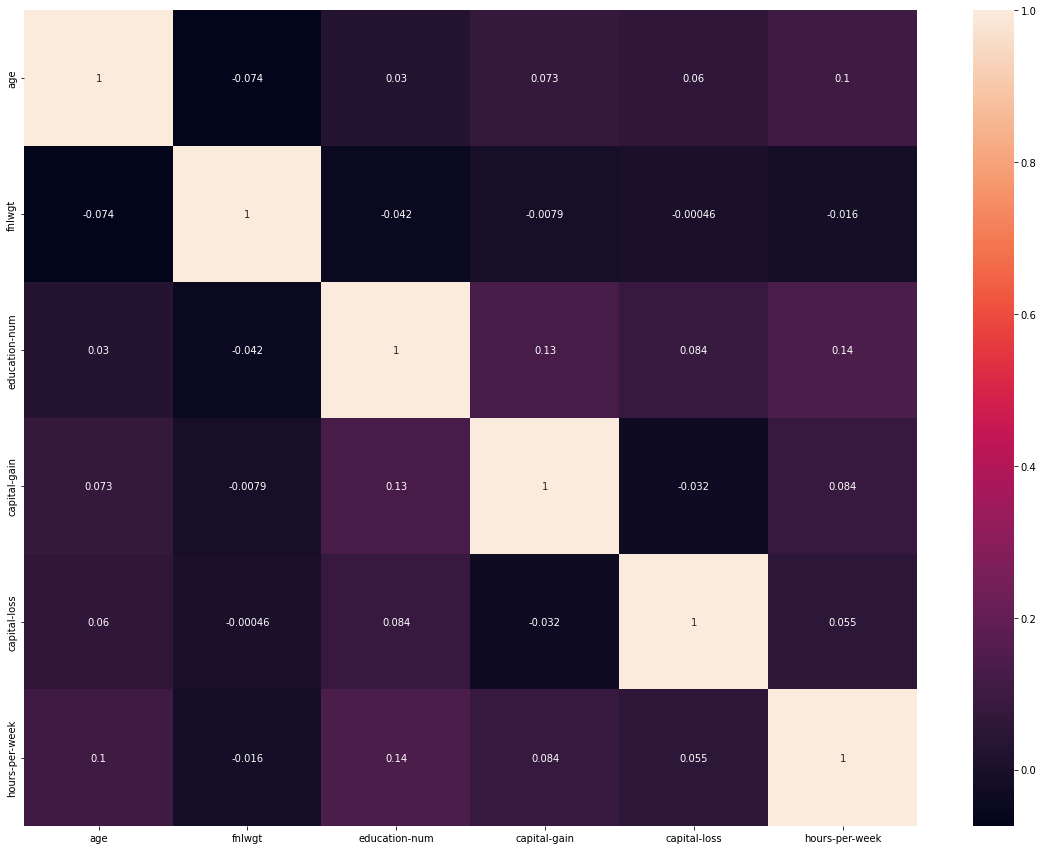

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [72]:
# check the standard deviation
df.std()


age                   13.251250
fnlwgt            105340.536363
education-num          2.545102
capital-gain        7587.519937
capital-loss         405.975466
hours-per-week        11.967935
dtype: float64

In [73]:

# check the quantile
df.quantile()

age                   37.0
fnlwgt            178322.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
Name: 0.5, dtype: float64

In [74]:
# check the minmumn value of Datasets
df.min()

age                               17
workclass                Federal-gov
fnlwgt                         13492
education                       10th
education-num                      1
marital-status              Divorced
occupation              Adm-clerical
relationship                 Husband
race              Amer-Indian-Eskimo
sex                           Female
capital-gain                     0.0
capital-loss                     0.0
hours-per-week                   1.0
native-country              Cambodia
income                         <=50K
dtype: object

In [75]:
# check the maximum value
df.min()

age                               17
workclass                Federal-gov
fnlwgt                         13492
education                       10th
education-num                      1
marital-status              Divorced
occupation              Adm-clerical
relationship                 Husband
race              Amer-Indian-Eskimo
sex                           Female
capital-gain                     0.0
capital-loss                     0.0
hours-per-week                   1.0
native-country              Cambodia
income                         <=50K
dtype: object

In [76]:
# check the mean 
df.mean()


age                   38.591145
fnlwgt            189913.328109
education-num         10.117553
capital-gain        1106.492015
capital-loss          89.532165
hours-per-week        40.984586
dtype: float64

In [77]:
# check the median 
df.median()


age                   37.0
fnlwgt            178322.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

In [78]:
# check the skewness
df.skew()


age                0.543868
fnlwgt             1.383405
education-num     -0.305626
capital-gain      11.712548
capital-loss       4.461582
hours-per-week     0.333753
dtype: float64

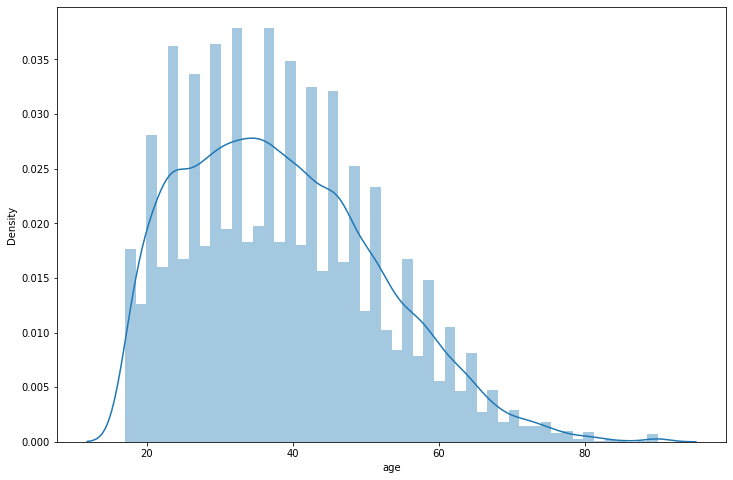

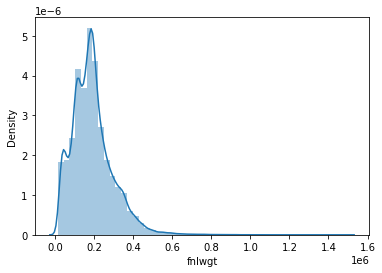

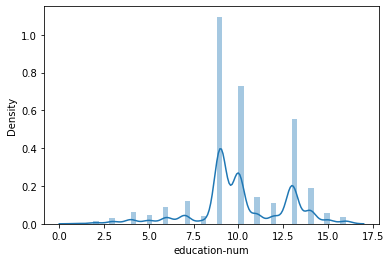

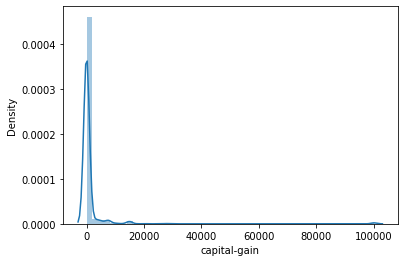

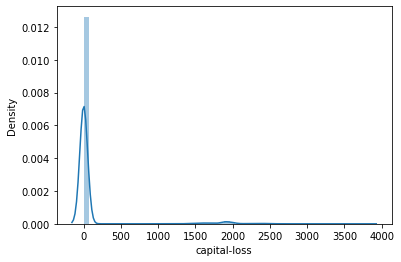

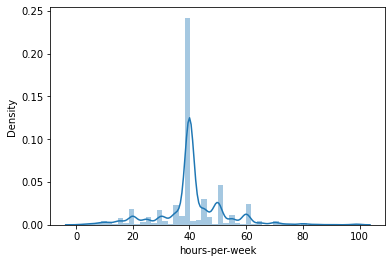

In [79]:
plt.figure(figsize=(12,8))
for i in num_columns:
  sns.distplot(df[i])
  plt.show()

<Figure size 864x576 with 0 Axes>

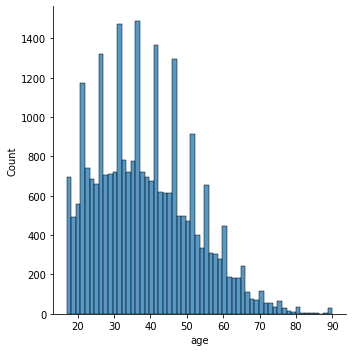

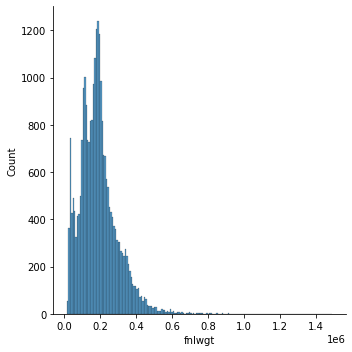

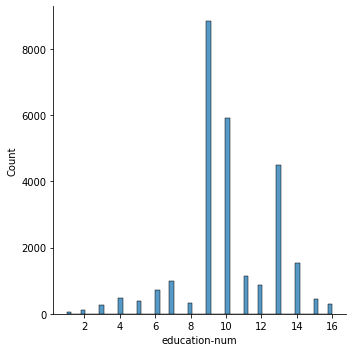

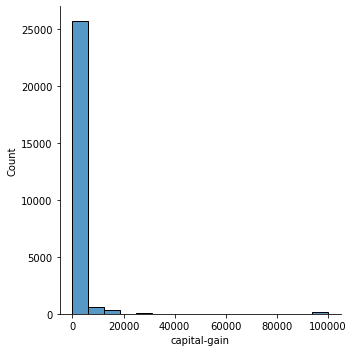

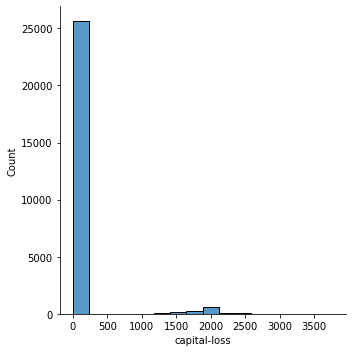

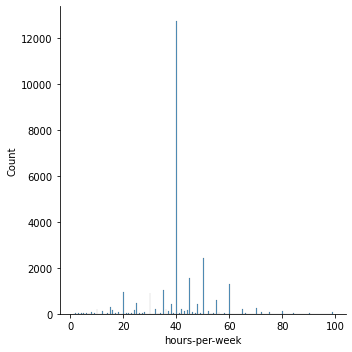

In [80]:
plt.figure(figsize=(12,8))
for i in num_columns:
  sns.displot(df[i])
  plt.show()

**Univariate Analyisis**

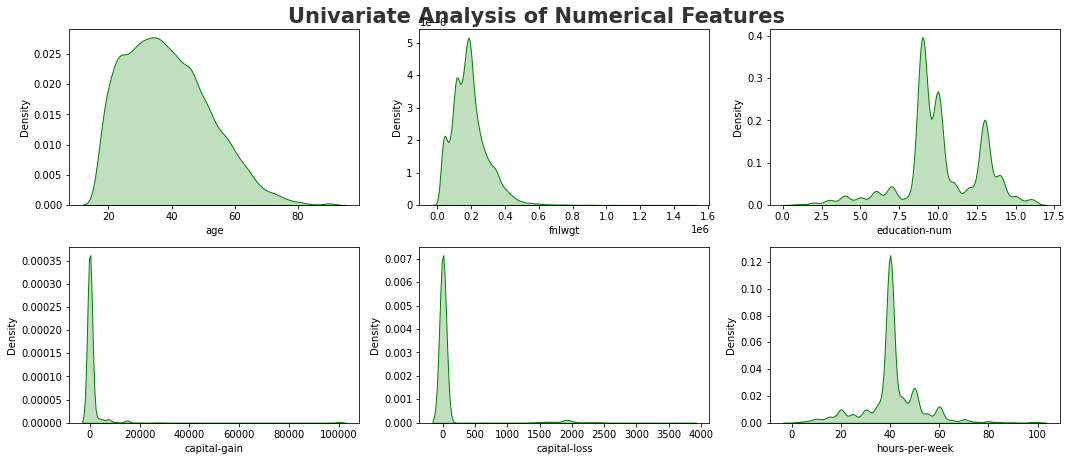

In [81]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize =21 ,fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_columns[i]],shade=True, color='g')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

<Figure size 864x648 with 0 Axes>

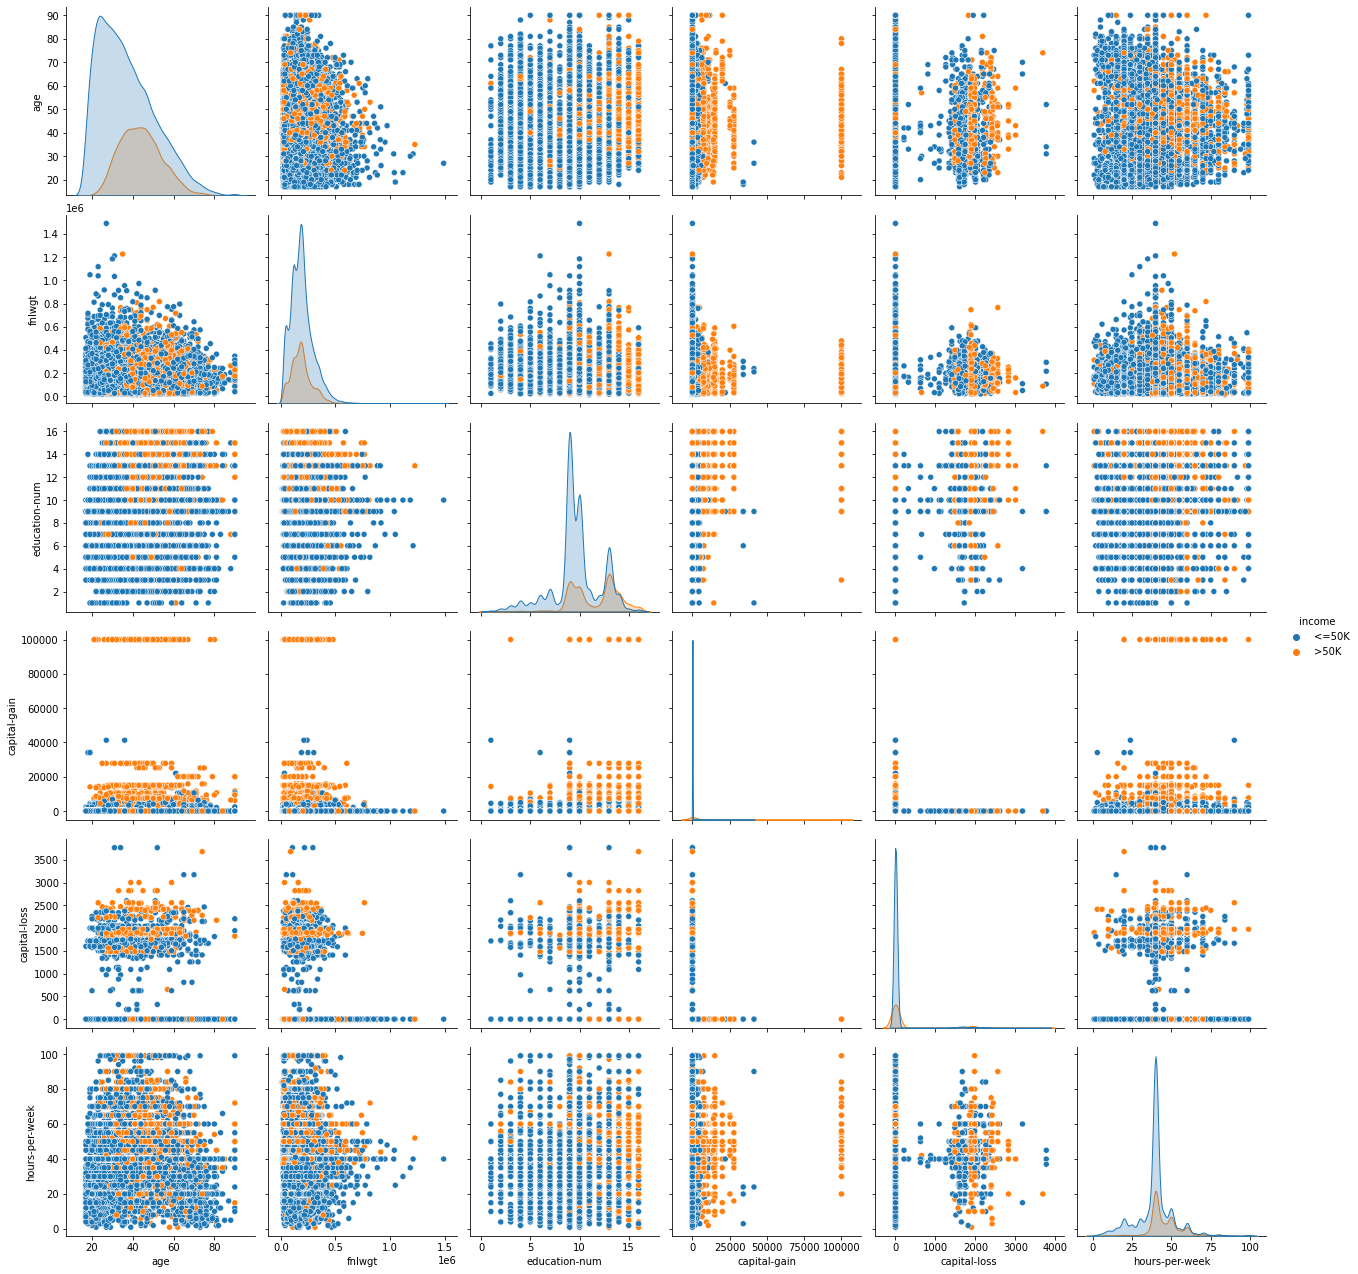

In [82]:
# Check the pairplot
plt.figure(figsize=(12,9))
sns.pairplot(df,hue='income' , size=3)
plt.show()

# Scatter plot to see the trend of each numerical 

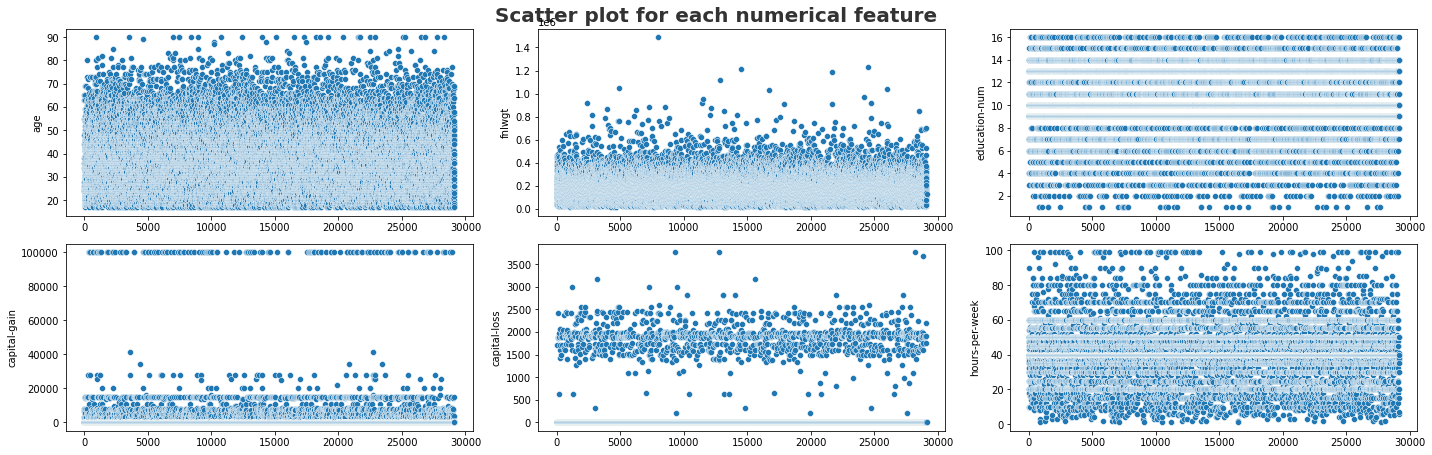

In [83]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for each numerical feature', fontsize = 20 , fontweight = 'bold', alpha = 0.8 , y = 1.)
for i in range(0 , len(num_columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_columns[i],x=df.index, data = df)
    plt.tight_layout()

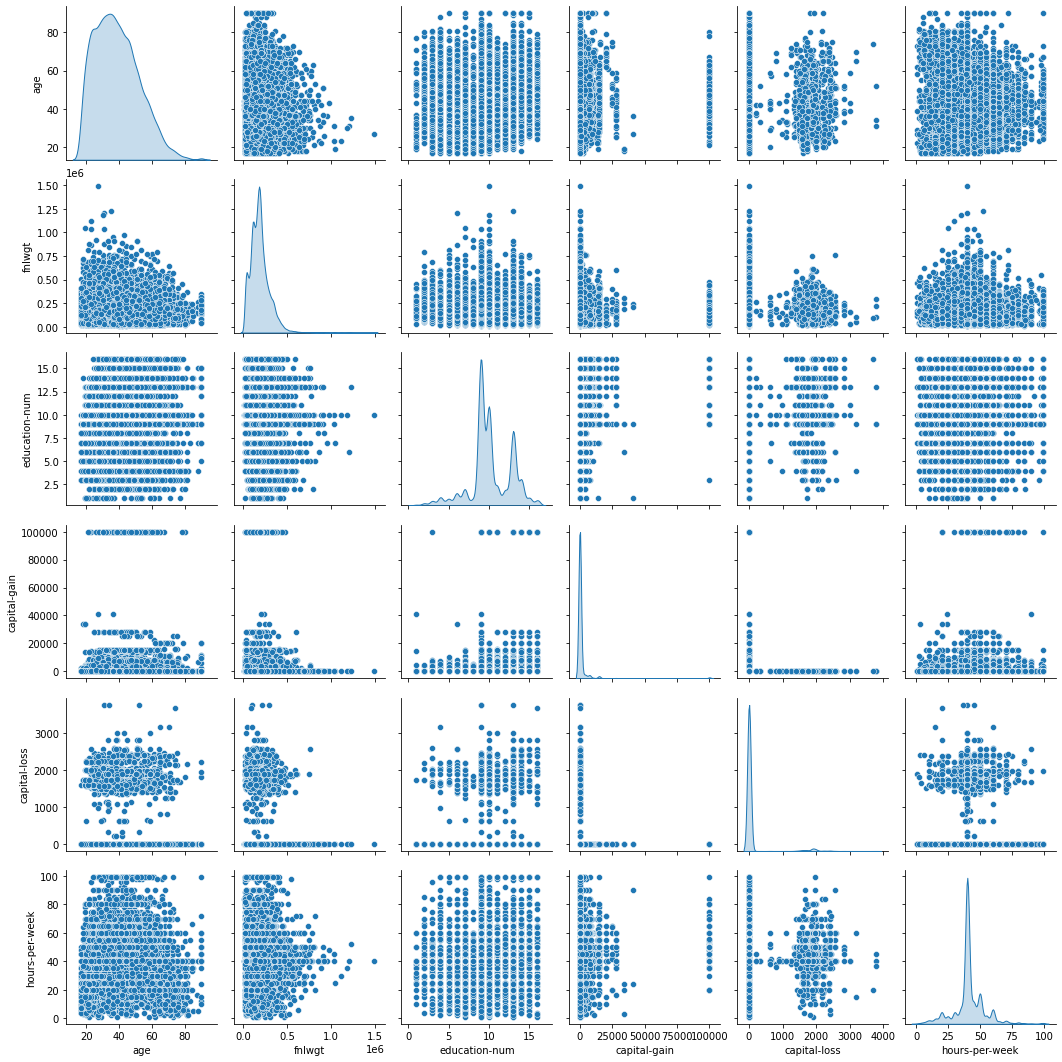

In [84]:
# check the pairplot
sns.pairplot(df ,diag_kind='kde' )

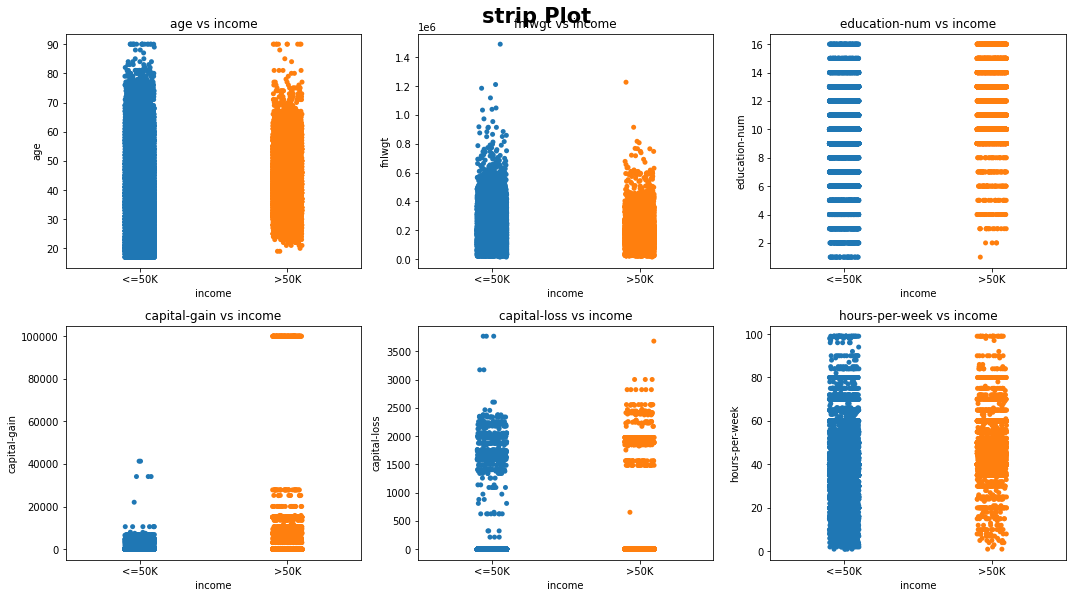

In [85]:
#Visualising data scatter in each continous feature with respect to quality 
plt.figure(figsize=(15,20))
plt.suptitle('strip Plot', fontsize =21 , fontweight ='bold' , alpha = 1 , y= 1)
for i in range (0 , len(num_columns)):
    plt.subplot(5 , 3 ,i+1)
    sns.stripplot(y= num_columns[i], x='income' , data=df)
    plt.title('{} vs income'.format(num_columns[i],fontsize=15))
    plt.tight_layout()

**Box plot**

[]

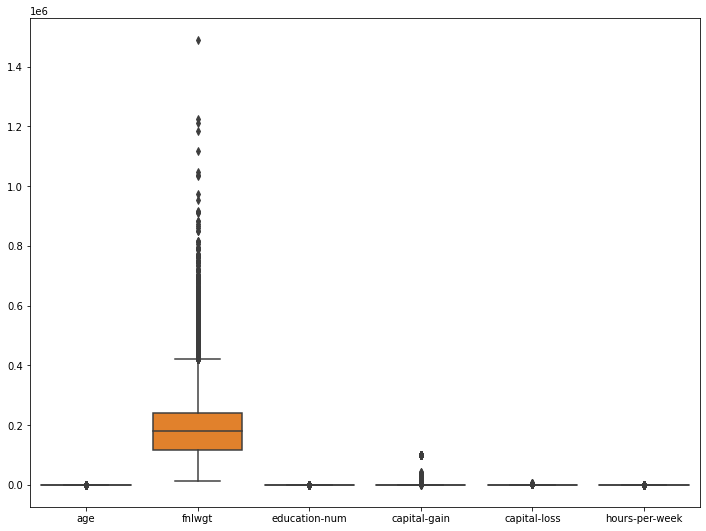

In [86]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df , orient="V")
plt.plot()

In [87]:
# drop the outliers
IQR=df['fnlwgt'].quantile(0.75) - df['fnlwgt'].quantile(0.25)
lower_fence=df['fnlwgt'].quantile(0.25) - 1.5*IQR
upper_fence=df['fnlwgt'].quantile(0.75) + 1.5*IQR

lower_fence , upper_fence


(-64564.5, 420879.5)

In [88]:
df['fnlwgt']=np.where(df['fnlwgt']>upper_fence , upper_fence , np.where(df['fnlwgt']<lower_fence , lower_fence , df['fnlwgt']))

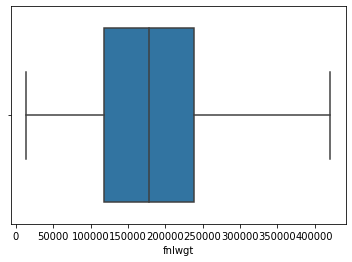

In [89]:
sns.boxplot(df['fnlwgt'])

In [90]:
# 2 
IQR=df['capital-gain'].quantile(0.75) - df['capital-gain'].quantile(0.25)

lower_fence=df['capital-gain'].quantile(0.25) - 1.5*IQR
upper_fence=df['capital-gain'].quantile(0.75) + 1.5*IQR
 
lower_fence , upper_fence

(0.0, 0.0)

In [91]:
df['capital-gain']=np.where(df['capital-gain']>upper_fence , upper_fence , np.where(df['capital-gain']<lower_fence , lower_fence , df['capital-gain']))

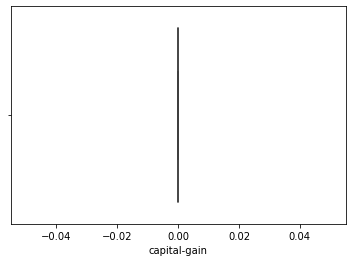

In [92]:
sns.boxplot(df['capital-gain'])

In [93]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Feature Selection

In [94]:
#  droping the unnecessay columns
df.drop(['marital-status','relationship' ,'race'],axis=1,inplace=True)

## Feature Encoding

In [95]:
df=pd.get_dummies(df)

In [96]:
df.head()

age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802.0              7           0.0           0.0            40.0   
1   38   89814.0              9           0.0           0.0            50.0   
2   28  336951.0             12           0.0           0.0            40.0   
3   44  160323.0             10           0.0           0.0            40.0   
5   34  198693.0              6           0.0           0.0            30.0   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  1   
1                      0                    0                  1   
2                      0                    1                  0   
3                      0                    0                  1   
5                      0                    0                  1   

   workclass_Self-emp-inc  ...  native-country_Scotland  native-country_South  \
0                       0  ...                        0                     0   
1                       0  ...                        0                     0   
2                       0  ...                        0                     0   
3                       0  ...                        0                     0   
5                       0  ...                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
5                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
5                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  income_<=50K  \
0                       0                          0             1   
1                       0                          0             1   
2                       0                          0             0   
3                       0                          0             0   
5                       0                          0             1   

   income_>50K  
0            0  
1            0  
2            1  
3            1  
5            0  

[5 rows x 87 columns]

In [97]:
# Segregate the feature (Independent variable )and labbles(Dependent Variables)
X=df.iloc[:,:-2]
X=df[['age', 'fnlwgt' ,'education-num', 'capital-gain' , 'capital-loss' ,'hours-per-week']]

In [98]:
X

age    fnlwgt  education-num  capital-gain  capital-loss  \
0       25  226802.0              7           0.0           0.0   
1       38   89814.0              9           0.0           0.0   
2       28  336951.0             12           0.0           0.0   
3       44  160323.0             10           0.0           0.0   
5       34  198693.0              6           0.0           0.0   
...    ...       ...            ...           ...           ...   
29115   18  270544.0              8           0.0           0.0   
29116   44  199551.0              7           0.0           0.0   
29117   36  231052.0              9           0.0           0.0   
29118   69  203072.0             16           0.0           0.0   
29119   17  126771.0              8           0.0           0.0   

       hours-per-week  
0                40.0  
1                50.0  
2                40.0  
3                40.0  
5                30.0  
...               ...  
29115            30.0  
29116            40.0  
29117            35.0  
29118            50.0  
29119             7.0  

[26924 rows x 6 columns]

In [99]:
y=df['income_>50K']

In [100]:
y

0        0
1        0
2        1
3        1
5        0
        ..
29115    0
29116    0
29117    0
29118    1
29119    0
Name: income_>50K, Length: 26924, dtype: uint8

# Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test , y_train,y_test=train_test_split(X,y,test_size=0.25 , random_state=10)

In [103]:
X_train.shape  ,   y_train.shape

((20193, 6), (20193,))

In [104]:
X_test.shape  , y_test.shape

((6731, 6), (6731,))

In [105]:
df.shape

(26924, 87)

## Model Building

**1.Logistic Regression**

In [106]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier


LogisticRegression()

In [107]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [108]:
classifier.score(X_train,y_train)

0.7592234932897539

In [109]:
y_predict=classifier.predict(X_test)

In [110]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [111]:
from sklearn.metrics import accuracy_score


In [112]:
accu_score=accuracy_score(y_predict, y_test)

In [113]:
accu_score

0.751151389095231

# 2.Support Vector Classifier

In [114]:
from sklearn.svm import SVC
svc=SVC()
svc

SVC()

In [115]:
svc.fit(X_train,y_train)

SVC()

In [116]:
svc.score(X_train,y_train)

0.7558559896994008

In [117]:
svc_predict=svc.predict(X_test)

In [118]:
svc_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_score(y_predict,y_test)

0.751151389095231

# 3... Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree

DecisionTreeClassifier()

In [122]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
decision_tree.score(X_train,y_train)


0.9973753280839895

[Text(0.5224215360151298, 0.9901960784313726, 'X[2] <= 12.5\ngini = 0.369\nsamples = 20193\nvalue = [15263, 4930]'),
 Text(0.2282101796563469, 0.9705882352941176, 'X[0] <= 30.5\ngini = 0.276\nsamples = 15130\nvalue = [12633, 2497]'),
 Text(0.046944970630705046, 0.9509803921568627, 'X[0] <= 26.5\ngini = 0.077\nsamples = 5206\nvalue = [4996, 210]'),
 Text(0.017694227731487624, 0.9313725490196079, 'X[5] <= 41.5\ngini = 0.035\nsamples = 3656\nvalue = [3591, 65]'),
 Text(0.011662707552061353, 0.9117647058823529, 'X[4] <= 2405.5\ngini = 0.019\nsamples = 3161\nvalue = [3131, 30]'),
 Text(0.011354017195017545, 0.8921568627450981, 'X[4] <= 1889.0\ngini = 0.018\nsamples = 3160\nvalue = [3131, 29]'),
 Text(0.007273516537844714, 0.8725490196078431, 'X[0] <= 23.5\ngini = 0.016\nsamples = 3138\nvalue = [3112, 26]'),
 Text(0.003164076159699027, 0.8529411764705882, 'X[0] <= 21.5\ngini = 0.006\nsamples = 2316\nvalue = [2309, 7]'),
 Text(0.0015434517852190375, 0.8333333333333334, 'X[1] <= 334522.5\ngini

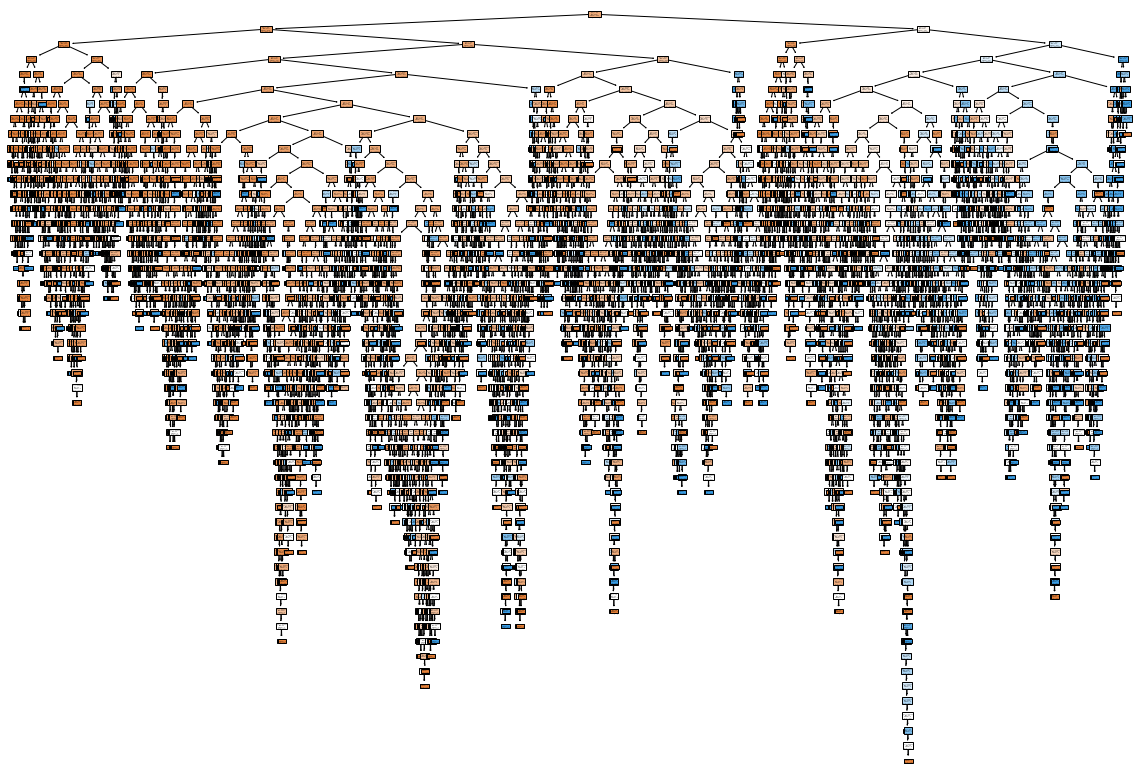

In [124]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,14))
tree.plot_tree(decision_tree,filled=True)

In [125]:
fig.savefig("Decision Tree Classifier")

In [126]:
y_predict=decision_tree.predict(X_test)

In [127]:
y_predict

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7282721735254791

In [129]:
grid_params={"criterion":['gini','entropy'],
             'max_depth':range(2,21,1),
             "min_samples_leaf":range(1,11,1),
             "min_samples_split":range(2,10,1),
             "splitter":['best','random']
    
}

## Hyper Parameter Tunning DecisionTreeClassifier Model

In [130]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=decision_tree,param_grid=grid_params,cv=5,verbose=1)

In [131]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6080 candidates, totalling 30400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 21),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [132]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [133]:
model_with_best_param=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=10,min_samples_split=2 , splitter='best')

In [134]:
model_with_best_param.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)

[Text(0.39570160505836577, 0.95, 'X[0] <= 27.5\nentropy = 0.802\nsamples = 20193\nvalue = [15263, 4930]'),
 Text(0.1073078793774319, 0.85, 'X[0] <= 23.5\nentropy = 0.195\nsamples = 4782\nvalue = [4638, 144]'),
 Text(0.04669260700389105, 0.75, 'X[5] <= 45.5\nentropy = 0.064\nsamples = 2766\nvalue = [2745, 21]'),
 Text(0.023346303501945526, 0.65, 'X[4] <= 1975.5\nentropy = 0.043\nsamples = 2563\nvalue = [2551, 12]'),
 Text(0.019455252918287938, 0.55, 'X[0] <= 20.5\nentropy = 0.037\nsamples = 2549\nvalue = [2539, 10]'),
 Text(0.011673151750972763, 0.45, 'X[1] <= 142744.5\nentropy = 0.009\nsamples = 1260\nvalue = [1259, 1]'),
 Text(0.007782101167315175, 0.35, 'X[1] <= 140369.5\nentropy = 0.024\nsamples = 420\nvalue = [419, 1]'),
 Text(0.0038910505836575876, 0.25, 'entropy = 0.0\nsamples = 410\nvalue = [410, 0]'),
 Text(0.011673151750972763, 0.25, 'entropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.01556420233463035, 0.35, 'entropy = 0.0\nsamples = 840\nvalue = [840, 0]'),
 Text(0.027

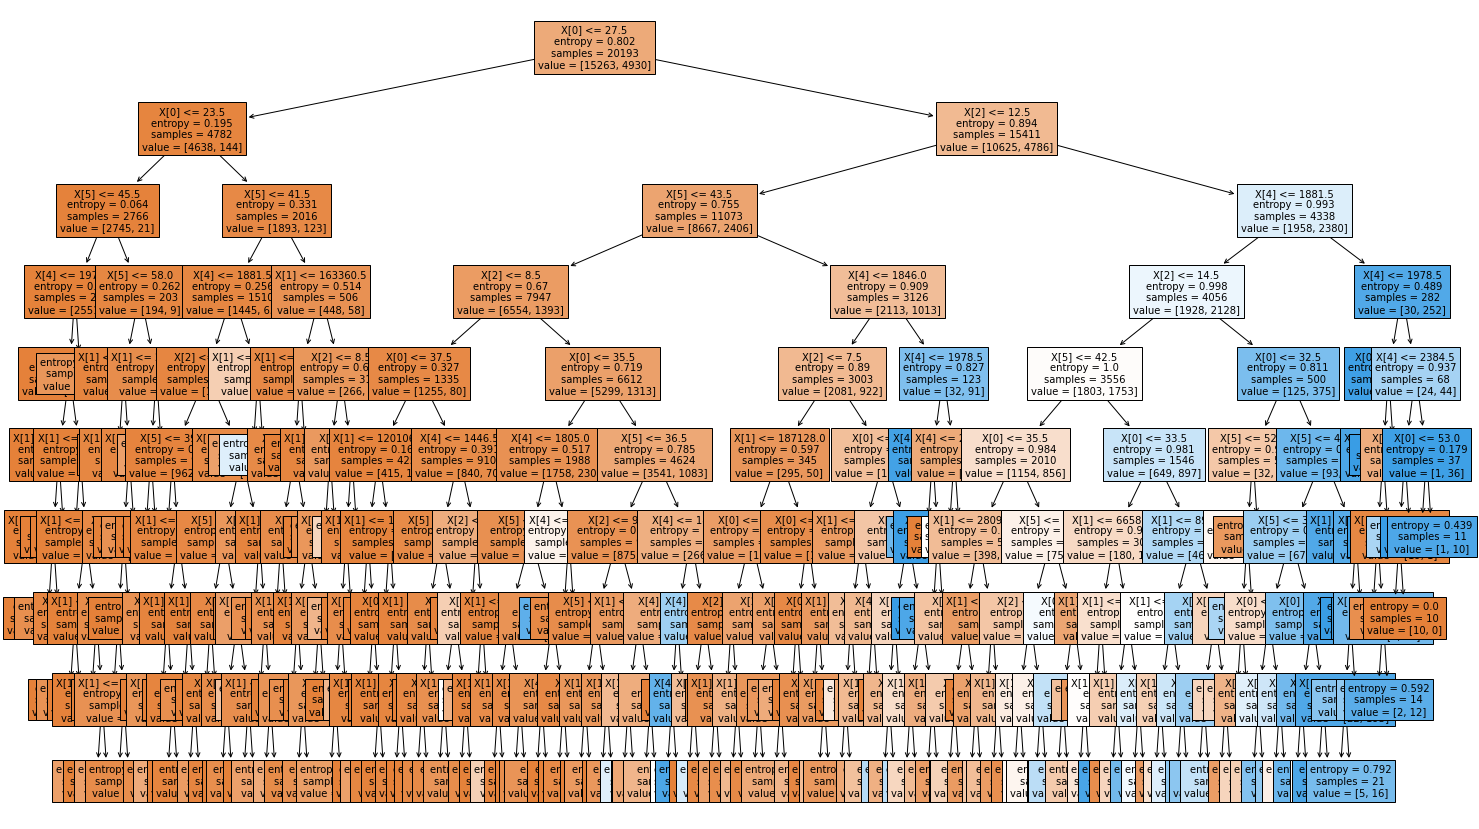

In [135]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_param,filled=True,fontsize=10)

In [136]:
y_predict2=model_with_best_param.predict(X_test)

In [137]:
accuracy_score(y_test,y_predict2)

0.7951270242163125

## 4...Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
Rf_classifier=RandomForestClassifier()
Rf_classifier

RandomForestClassifier()

In [139]:
Rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [140]:
y_predict_rf_class=Rf_classifier.predict(X_test)

In [141]:
accuracy_score(y_test,y_predict_rf_class)

0.7666022879215569

**Hyper Parameter Tunning RandomForestClasifier**

In [142]:
grid_param = {
    "n_estimators" : [90,100,120,150],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,11,1),
    'min_samples_leaf' : range(1,11,1),
    'min_samples_split': range(2,12,1),
    'max_features' : ['auto','log2']
}

In [143]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=Rf_classifier,param_distributions=grid_param,cv=2,verbose=2,n_jobs=-1 )
random

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 11),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 12),
                                        'n_estimators': [90, 100, 120, 150]},
                   verbose=2)

In [144]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 11),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 12),
                                        'n_estimators': [90, 100, 120, 150]},
                   verbose=2)

In [145]:
random.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [146]:
Rf_classifier.best_param=RandomForestClassifier(n_estimators=120,min_samples_split=7,min_samples_leaf=2,max_features='log2',max_depth=9,criterion='entropy')

In [147]:
Rf_classifier.best_param.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=2, min_samples_split=7,
                       n_estimators=120)

In [148]:
y_pred_rf_bestparam   =  random.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred_rf_bestparam)

0.7955727232209181

# Extra Trees Classifier

In [240]:
from sklearn.ensemble import ExtraTreesClassifier
et_model=ExtraTreesClassifier()

In [241]:
et_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [246]:
y_pred_et=et_model.predict(X_test)
y_pred_et

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [247]:
from sklearn.metrics import accuracy_score
et_acc = accuracy_score(y_test,y_pred_et)

In [248]:
et_acc

0.7493685930768088

## Hyper parameter Tunning Extra Trees Classifier

In [249]:
param={
    "n_estimators":[40,90,130,500],
    'max_depth':[15,20,24,60],
    'max_features':[4,'auto'],
    "min_samples_split":[3,6,10,18]

    
}

In [251]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=et_model, param_distributions = param , n_iter = 99 , verbose = 2 ,n_jobs=-1)

In [252]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


RandomizedSearchCV(estimator=ExtraTreesClassifier(), n_iter=99, n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 24, 60],
                                        'max_features': [4, 'auto'],
                                        'min_samples_split': [3, 6, 10, 18],
                                        'n_estimators': [40, 90, 130, 500]},
                   verbose=2)

In [253]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'max_features': 4,
 'max_depth': 15}

In [254]:
et_bestparam = ExtraTreesClassifier(n_estimators=500 , min_samples_split=10 , max_features=4 , max_depth=15)

In [255]:
et_bestparam.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=15, max_features=4, min_samples_split=10,
                     n_estimators=500)

In [256]:
y_pred_et=et_bestparam.predict(X_test)

In [258]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_et)

0.8004754122715793

**5...Random Forest Bagging Classifier**

In [150]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [151]:
model_bagging_svc=BaggingClassifier(base_estimator=SVC(), n_estimators=70, random_state=0).fit(X_train,y_train)

In [152]:
y_predict_bagging=model_bagging_svc.predict(X_test)

In [153]:
accuracy_score(y_test,y_predict_bagging)

0.747140098053781

# **Volting Classifier**

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1=LogisticRegression(multi_class='multinomial',random_state=1)
clf2=RandomForestClassifier(n_estimators=50 , random_state=1)
clf3=GaussianNB()

eclf1=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)])


In [155]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())])

In [156]:
y_pred_voting=eclf1.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score
vot_accur= accuracy_score(y_test,y_pred_voting)

In [158]:
vot_accur

0.7573911751597088

**6...Ada Boosting Classifier Model**

In [159]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada

AdaBoostClassifier()

In [160]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [161]:
y_predict_ada=ada.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_ada)

0.8016639429505275

**Hyper Parameter Tunning Ada Boosting Classifier**

In [179]:
grid_param={
    'n_estimators':[70,80,145,160],
    'learning_rate':[1.0,0.01,0.001]
}

In [180]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=ada, param_grid=grid_param,cv=2,verbose=1, n_jobs=-1)

In [181]:
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.01, 0.001],
                         'n_estimators': [70, 80, 145, 160]},
             verbose=1)

In [191]:
grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 160}

In [192]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(learning_rate=1.0 , n_estimators=160)

In [193]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=160)

In [194]:
y_predict_ada2=ada.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_ada2)

0.80240677462487

## Gradient Boosting Classifier Model  (GB)

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm=GradientBoostingClassifier()
model_gbm

GradientBoostingClassifier()

In [204]:
model_gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [205]:
y_predict_gbm=model_gbm.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_gbm)

0.8016639429505275

## Extrme Gradient Bossting Classifier Model  ( XGB)

In [231]:
import xgboost
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)

In [232]:
model_xgb.fit(X_train,y_train)

XGBClassifier()

In [233]:
y_pred_xgb=model_xgb.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred_xgb)

0.8013668102807904